# Exploratory Data Analysis

EDA refers to a set of procedures for producing descriptive and graphical summaries of data. A benefit of EDA is that is allows you to examine the data as it is without making any assumptions.
It is a useful way to examine your data, analyse relationships among variables and identify any problems such as data entry errors.



## Import necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

There are 3 main steps in EDA:
1. Data Exploration
2. Data Cleaning
3. Data Visualization

## Data Exploration

**1. Categorical Attributes**
 * **workclass**:  workclass of an individual.
 * **education**: Individual's highest education degree  
 * **marital-status**: Marital status of an individual. 
 * **occupation**:  occupation of an individual.
 * **relationship**:  relationship of an individual.   
 * **race**:  race of an individual
 * **sex**: sex of an individual
 * **native-country**: individual native country  

**2. Continuous Attributes**
 * **age**: Age of an individual  
 * **capital-gain**: capital gain of an individual
 * **capital-loss**: capital loss of an individual
 * **hours-per-week**: hours worked per week of an individual

In [4]:
# Load the data
data = pd.read_csv('adults.csv')
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,financial_status
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,poor
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,poor
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,rich
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,rich
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,poor


In [5]:
#shape of data 
data.shape

(48842, 13)

In [6]:
## Data cleaning
#Dealing with missing values
data.isnull().sum()

age                    0
workclass           2799
education              0
marital-status         0
occupation          2809
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country       857
financial_status       0
dtype: int64

We can see that there are missing values in workclass, occupation and native country columns.
As our dataset has more 48000 rows we can drop the rows with missing values.

In [7]:
#drop rows with missing values
data = data.dropna()
data.isnull().sum()

age                 0
workclass           0
education           0
marital-status      0
occupation          0
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
financial_status    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45222 non-null  int64 
 1   workclass         45222 non-null  object
 2   education         45222 non-null  object
 3   marital-status    45222 non-null  object
 4   occupation        45222 non-null  object
 5   relationship      45222 non-null  object
 6   race              45222 non-null  object
 7   gender            45222 non-null  object
 8   capital-gain      45222 non-null  int64 
 9   capital-loss      45222 non-null  int64 
 10  hours-per-week    45222 non-null  int64 
 11  native-country    45222 non-null  object
 12  financial_status  45222 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [9]:
## Statistics for the data
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1101.430344,88.595418,40.938017
std,13.217870,7506.430084,404.956092,12.007508
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Some insights from the data:
* Age column:
1. Average age is 38 years.
2. Age range changes from 17 to 90 years.
3. First quartile 25% shows that 25% of the observations is below 28 years.
4. Second quartile 50% shows that 50% of the observations is between 28 and 37 years.
5. Third quartile 75% shows that 75% of the observations is below 47 years.


### Analyze cateogrical attributes

In [10]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,financial_status
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,poor
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


* Native country has the maximum number of unique observations.
* Top category in workclass is `Private` with more than 33000 observation
* Race and native country is biased column, race is biased with white and country is biased with United states

## Data visualization

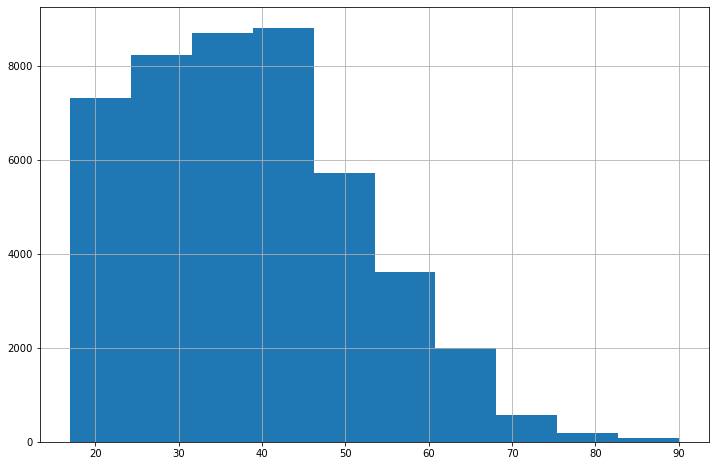

In [11]:
#Age
data['age'].hist(figsize=(12,8))
plt.show()

What we can observe from here:
* Age column is not symmetric
* It is right skewed 
* We can observe that age column has less observation for age more than 70 year

In [12]:
data[data['age']>70].shape

(636, 13)

In [13]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,financial_status
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,poor
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,poor
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,rich
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,rich
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,poor


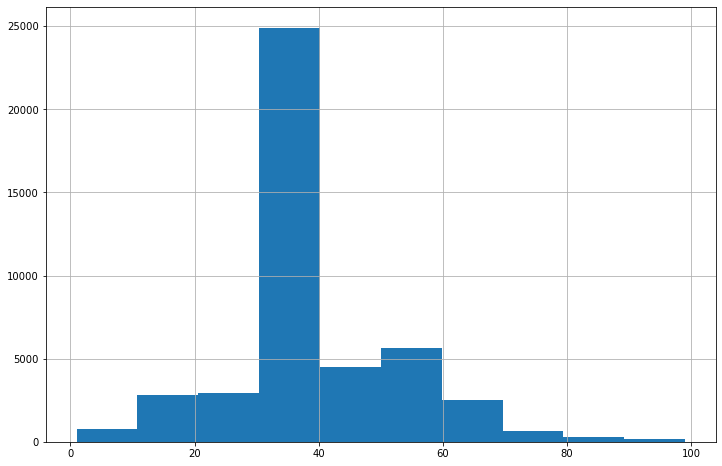

In [14]:
#hours per week
data['hours-per-week'].hist(figsize=(12,8))
plt.show()

What we can observe from here:
* The work hour per week column change from 1 to 99 hours
* Most of the people work around 30-40 hours per week

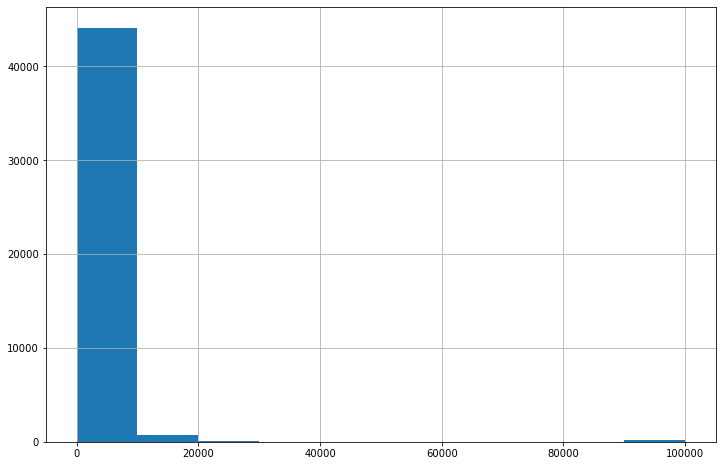

In [15]:
data['capital-gain'].hist(figsize=(12,8))
plt.show()

What we can observe here:
* capital gain focuses on value between 0 and 100000, and other values with very low observations
* capital gain focuses more on one particular value and others with high standart deviation

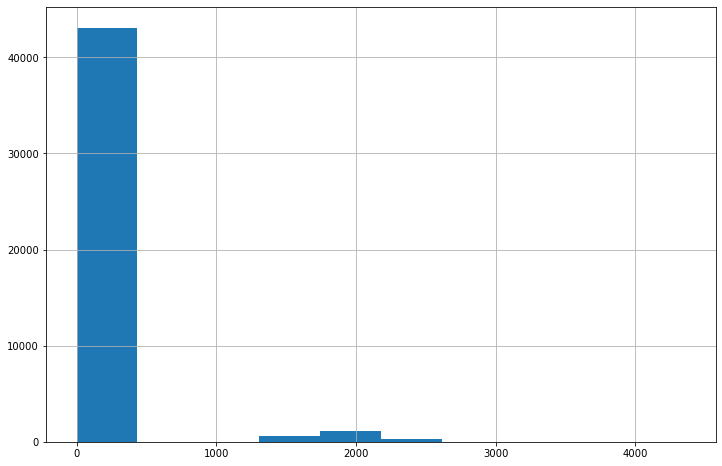

In [16]:
#capital loss
data['capital-loss'].hist(figsize=(12,8))
plt.show()

We can see that capital gain and capital loss has similar distribution.

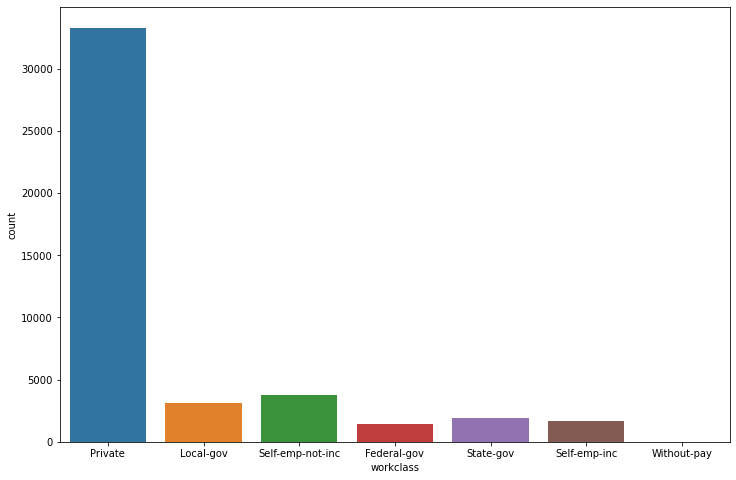

In [17]:
#workclass column
plt.figure(figsize=(12,8))
ax = sns.countplot(x="workclass", data=data)
plt.show()

In [18]:
data[data['workclass']=='withot-pay'].shape

(0, 13)

We can observe that there is strong inbalance in workclass column. For example, Private is the most common workclass, however without-pay is the lowest with only 13 observations 

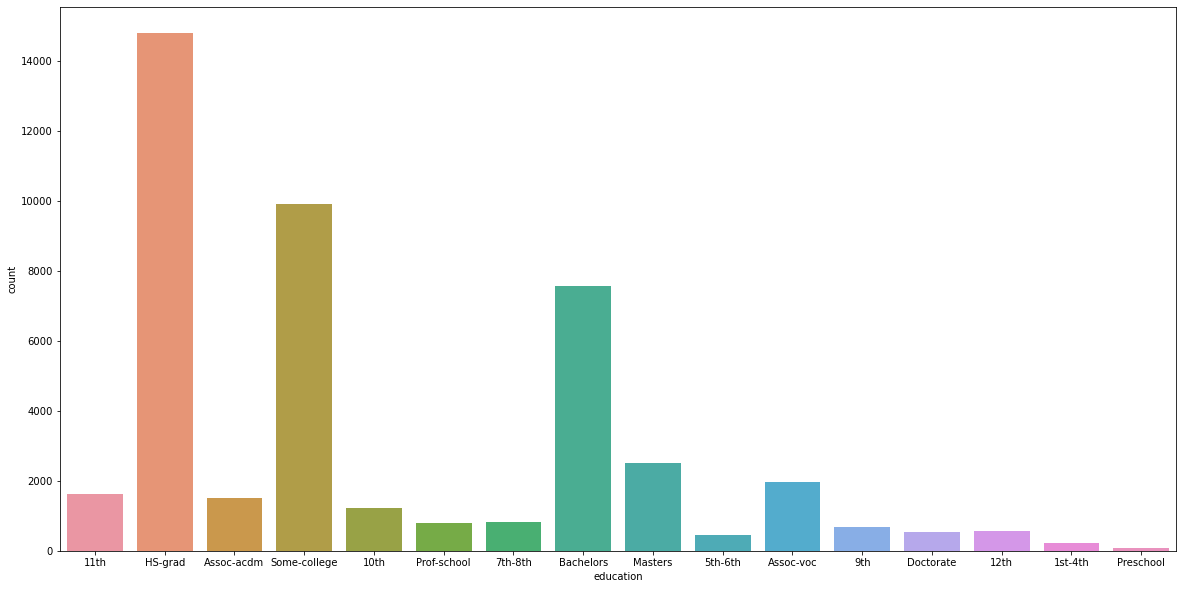

In [19]:
#education
plt.figure(figsize=(20,10))
ax = sns.countplot(x="education", data=data)
plt.show()

From the chart above we can visualize that HS-grad, some-collage and bachelors are the top 3 education levels.

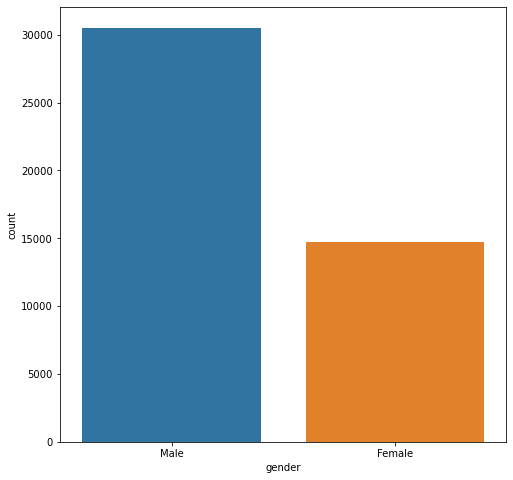

In [20]:
#gender column
plt.figure(figsize=(8,8))
ax = sns.countplot(x="gender", data=data)
plt.show()

In gender column we also observe inbalancing. We have much more males than females, later 
we need to deal with imbalance techniques as well.

Now let's see our target variable which is financial status. 

### Relationship between 2 variables Age and Income

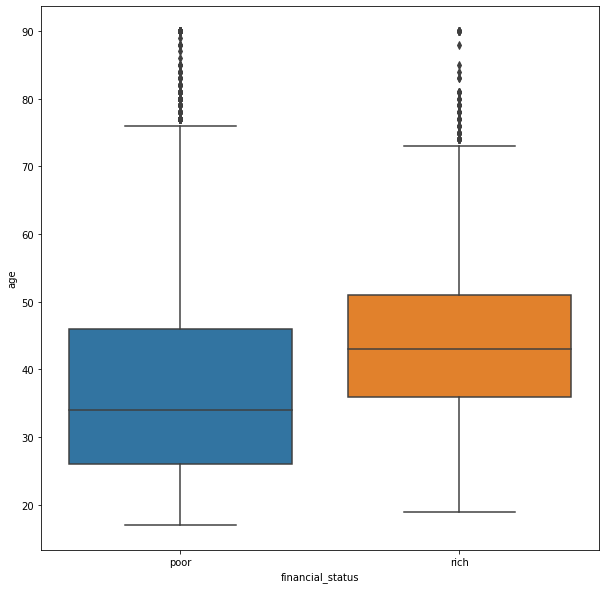

In [21]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="financial_status", y="age", data=data)
plt.show()

What we can observe from this boxplot?

* There are some outliers in both rich and poor group
* Mean age for poor category is less than mean age for rich category

Hypothesis testing: does age has relationship with financial status?
To determine this we will use hypothesis testing. Hypothesis testing is statistical method that is used to test if the null hypothesis is true. In hypothesis testing we have two hypothesis:
1. Null hypothesis: age has no relationship with financial status.
2. Alternative hypothesis: age has relationship with financial status.
And our goal is to check whether null hypothesis true or false  and reject null hypothesis if it is false.

In our scenario we have two hypothesis:
1. Null hypothesis: age has no relationship with financial status.
2. Alternative hypothesis: age has relationship with financial statuscome.

In [23]:
data[data['financial_status']=='rich']['age']

2        28
3        44
7        63
10       65
14       48
         ..
48819    38
48826    39
48835    53
48838    40
48841    52
Name: age, Length: 11208, dtype: int64

In [30]:
rich = data[data['financial_status']=='rich']['age']
poor = data[data['financial_status']=='poor']['age']

rich = rich.values.tolist()
rich = random.sample(rich, 100)
poor = poor.values.tolist()
poor = random.sample(poor, 100)

In [31]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(rich,poor)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.342462024922346
p value 0.0009927951734686974
we reject null hypothesis


### Relationship between numerical variables

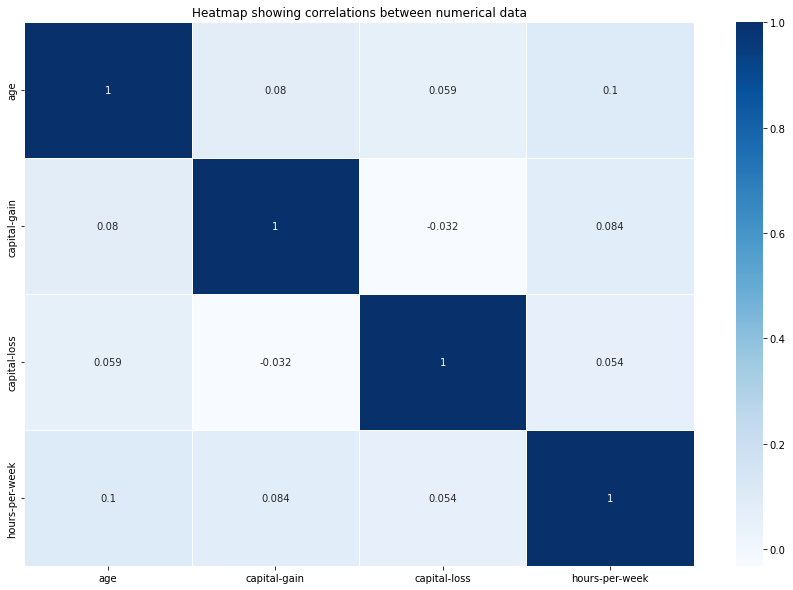

In [34]:
plt.figure(figsize=(15,10))  
data_num = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

* There is no strong correlation between numeric variables.
* The strongest correlation is between hours-per-week and age with coefficient of 0.1

### Correlation between financial_status, age and gender

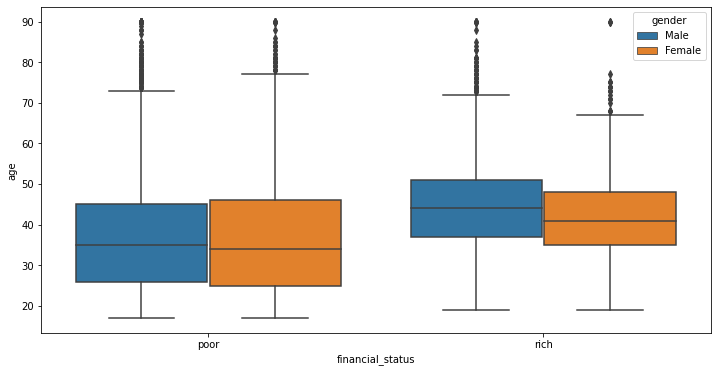

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='financial_status',y ='age', hue='gender',data=data)
plt.show()

* The median for poor people category doesn't differ much between male and female
* However there is significant difference between female and male in the median of their ages

## Adding new variablesm

You remember when we check the capital income and capital loss column , they share the similar distribution. What we can do, we can create new column named 'capital_change' and in this column we will show the difference of two columns

In [40]:
#new column named 'capital_change'
data['capital_change'] = data['capital-gain'] - data['capital-loss']

In [41]:
data.describe()

,age,capital-gain,capital-loss,hours-per-week,capital_change
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1101.430344,88.595418,40.938017,1012.834925
std,13.217870,7506.430084,404.956092,12.007508,7530.315380
min,17.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,99999.000000


Now let's check if there is a correlation between capital change and financial_status. We will use hypothesis testig method as we did earlier.



In [42]:
rich = data[data['financial_status']=='rich']['capital_change']
poor = data[data['financial_status']=='poor']['capital_change']

rich = rich.values.tolist()
rich = random.sample(rich, 100)
poor = poor.values.tolist()
poor = random.sample(poor, 100)

In [43]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(rich,poor)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.1328072982074384
p value 0.001994132919396208
we reject null hypothesis


The reason we did this is dimensionality reduction. Dimensionality reduction means that we are reducing the dimension of our data. It helps us to reduce the number of variables in our data and it will also reduce the complexity of our model we will buil later for prediction. Now we can drop other 2 columns capital_gain and capital_loss, and keep capital change column.

You can analyse for other variables, between 2 two variables even correlation between 3 and more variables at the same time. The important part is to interpret your graphs and to understand the relationship between variables.
